# Task Selection: An Example

This is an example of how to perform task selection using MTEB when creating a benchmark. The goal here is to subsample a potentially large number of tasks down to the one with the most information. We do this as a feature selection approach, where we remove a task if its performance if predictable by the performance of other tasks. See the paper for more information.

For this example we will be using Danish (dan) as it has relatively few tasks, but there is not reason to limit to only Danish tasks.

In [1]:
from __future__ import annotations

import mteb

print(mteb.__version__)

/Users/au561649/.virtualenvs/mteb/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.48


## Loading in data
We will start out by loading in the relevant data for the model and tasks of interests.

In [2]:
def get_models():
    model_names = [
        "sentence-transformers/all-MiniLM-L6-v2",
        "sentence-transformers/all-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
        "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
        "sentence-transformers/all-mpnet-base-v2",
        "sentence-transformers/LaBSE",
        "intfloat/multilingual-e5-large-instruct",
        "intfloat/e5-mistral-7b-instruct",
        "GritLM/GritLM-7B",
        "GritLM/GritLM-8x7B",
        "intfloat/multilingual-e5-small",
        "intfloat/multilingual-e5-base",
        "intfloat/multilingual-e5-large",
    ]
    models: list[mteb.ModelMeta] = [mteb.get_model_meta(name) for name in model_names]

    # get missing revisions - Assuming we are using the latest revision
    for model in models:
        if model.revision is None:
            print(f"Getting revision for {model.name}")
            encoder = model.load_model()
            model.revision = encoder.model_card_data.base_model_revision  # type: ignore

    return models


models = get_models()

danish_tasks = mteb.get_tasks(
    languages=["dan"]
)  # does not need to language - you can also filter by task types, domains, etc.

Getting revision for sentence-transformers/all-MiniLM-L12-v2
Getting revision for sentence-transformers/all-mpnet-base-v2


In [3]:
# just to see what tasks we are working with
for task in danish_tasks:
    print(task.metadata.name)

BornholmBitextMining
BibleNLPBitextMining
FloresBitextMining
NTREXBitextMining
Tatoeba
AngryTweetsClassification
DanishPoliticalCommentsClassification
DKHateClassification
LccSentimentClassification
MassiveIntentClassification
MassiveScenarioClassification
NordicLangClassification
ScalaClassification
SIB200Classification
SIB200ClusteringS2S
WikiClusteringP2P.v2
DanFeverRetrieval
TV2Nordretrieval
TwitterHjerneRetrieval
BelebeleRetrieval
WikipediaRetrievalMultilingual
MultiEURLEXMultilabelClassification
WikipediaRerankingMultilingual


In [6]:
# load results from mteb/results repository
mteb_results = mteb.load_results(
    models=models, tasks=danish_tasks, download_latest=False
)

In [5]:
mteb_results

{'intfloat/multilingual-e5-small': {'e4ce9877abf3edfe10b0d82785e83bdcb973e22e': [MTEBResults(task_name=LccSentimentClassification, scores=...),
   MTEBResults(task_name=FloresBitextMining, scores=...),
   MTEBResults(task_name=WikiClusteringP2P.v2, scores=...),
   MTEBResults(task_name=AngryTweetsClassification, scores=...),
   MTEBResults(task_name=TwitterHjerneRetrieval, scores=...),
   MTEBResults(task_name=MassiveIntentClassification, scores=...),
   MTEBResults(task_name=MassiveScenarioClassification, scores=...),
   MTEBResults(task_name=WikipediaRerankingMultilingual, scores=...),
   MTEBResults(task_name=BornholmBitextMining, scores=...),
   MTEBResults(task_name=DanishPoliticalCommentsClassification, scores=...),
   MTEBResults(task_name=SIB200ClusteringS2S, scores=...),
   MTEBResults(task_name=NordicLangClassification, scores=...),
   MTEBResults(task_name=Tatoeba, scores=...),
   MTEBResults(task_name=BelebeleRetrieval, scores=...),
   MTEBResults(task_name=BibleNLPBitextMi

## Computing the most predictable task

We will start out by constructing a dataframe from the results. Where we will compute the most predictictable task given a model and a set of tasks.

In [12]:
import mteb.task_selection as task_selection

results_df = task_selection.results_to_dataframe(
    mteb_results, drop_na=False, languages=["dan"]
)

In [13]:
results_df.head()  # inspect the dataframe

,task,AngryTweetsClassification,BelebeleRetrieval,BibleNLPBitextMining,BornholmBitextMining,DanFeverRetrieval,DanishPoliticalCommentsClassification,FloresBitextMining,LccSentimentClassification,MassiveIntentClassification,MassiveScenarioClassification,...,NordicLangClassification,SIB200Classification,SIB200ClusteringS2S,ScalaClassification,TV2Nordretrieval,Tatoeba,TwitterHjerneRetrieval,WikiClusteringP2P.v2,WikipediaRerankingMultilingual,WikipediaRetrievalMultilingual
model,revision,,,,,,,,,,,,,,,,,,,,,
intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.562846,0.907317,0.949219,0.332181,0.40416,0.364127,0.822655,0.601333,0.606893,0.679691,...,0.758533,0.756863,0.411994,0.509961,0.92682,0.912300,0.42163,0.203832,0.897135,0.90878
intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.576886,0.946187,0.976562,0.296079,0.40868,0.394338,0.826064,0.615333,0.636954,0.711836,...,0.801533,0.782353,0.465025,0.516162,0.95369,0.950800,0.35219,0.206153,0.912693,0.92426
intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.645081,0.923867,0.992188,0.552233,0.40513,0.448807,0.929799,0.708000,0.718527,0.774748,...,0.824433,0.828431,0.586632,0.507129,0.93690,0.955333,0.77233,0.242545,0.900087,0.90626
intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e,0.562655,0.854937,0.839258,0.371457,0.39601,0.348182,0.762986,0.586000,0.561197,0.640282,...,0.721500,0.747059,0.386207,0.508008,0.90379,0.863838,0.29358,0.195741,0.883712,0.89263
sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7,0.511079,0.739557,0.989583,0.456256,0.34537,0.383403,0.838430,0.500667,0.582313,0.652589,...,0.353867,0.599510,0.284970,0.506104,0.76295,0.957067,0.14380,0.177777,0.825927,0.69096


In [14]:
from sklearn.linear_model import LinearRegression

task_predictablity = task_selection.most_predictable_task(
    results_df,
    sklearn_estimator=LinearRegression(),  # model to predict performance on a held out task given the performance on the other tasks
    metrics=[
        task_selection.spearman,
        task_selection.pearson,
        task_selection.mse_with_zscore,
    ],
)

Task: WikipediaRetrievalMultilingual: 100%|██████████| 22/22 [00:00<00:00, 67.96it/s]      


In [15]:
task_predictablity  # task ordered by predictability of fist metric

[{'BelebeleRetrieval': {'spearman': 0.9878787878787878,
   'pearson': 0.9970507409976126,
   'mse_with_zscore': 0.005898518004774879}},
 {'NTREXBitextMining': {'spearman': 0.9515151515151514,
   'pearson': 0.9867856182994142,
   'mse_with_zscore': 0.026428763401171528}},
 {'TV2Nordretrieval': {'spearman': 0.9515151515151514,
   'pearson': 0.9779518119166111,
   'mse_with_zscore': 0.04409637616677795}},
 {'MassiveScenarioClassification': {'spearman': 0.9151515151515152,
   'pearson': 0.9595171124139267,
   'mse_with_zscore': 0.08096577517214652}},
 {'WikipediaRerankingMultilingual': {'spearman': 0.9151515151515152,
   'pearson': 0.9478418113623516,
   'mse_with_zscore': 0.10431637727529648}},
 {'WikipediaRetrievalMultilingual': {'spearman': 0.9030303030303028,
   'pearson': 0.9295224767277619,
   'mse_with_zscore': 0.14095504654447644}},
 {'BibleNLPBitextMining': {'spearman': 0.8787878787878788,
   'pearson': 0.9964031787166682,
   'mse_with_zscore': 0.00719364256666383}},
 {'Tatoeba': 

# Task Selection

In this section we will do the task selection to construct a benchmark.

### Manual Curation
Naturally you can always select your datasets manually and there might be plenty reasons to do so:

In [16]:
# if you wish you can do some manual filtering here, which we will do in this example:
tasks_to_remove = [
    "DKHateClassification",  # due to it being a gated dataset on huggingface (requiring to sign a form)
    "MultiEURLEXMultilabelClassification",  # due to it being very large
]

In [17]:
# we also want somewhat permissible licenses

for t in danish_tasks:
    print(t.metadata.name, "-", t.metadata.license)

# based on this we will probably also remove:
tasks_to_remove += ["DanishPoliticalCommentsClassification"]  # ambiguous license

BornholmBitextMining - CC-BY-4.0
BibleNLPBitextMining - CC-BY-SA-4.0
FloresBitextMining - CC BY-SA 4.0
NTREXBitextMining - CC-BY-SA-4.0
Tatoeba - CC BY 2.0
AngryTweetsClassification - CC-BY-4.0
DanishPoliticalCommentsClassification - Not specified
DKHateClassification - CC-BY-4.0
LccSentimentClassification - CC-BY-4.0
MassiveIntentClassification - Apache 2.0
MassiveScenarioClassification - Apache 2.0
NordicLangClassification - cc-by-sa-3.0
ScalaClassification - CC BY-SA 4.0
SIB200Classification - cc-by-sa-4.0
SIB200ClusteringS2S - cc-by-sa-4.0
WikiClusteringP2P.v2 - cc-by-sa-3.0
DanFeverRetrieval - CC BY-SA 4.0
TV2Nordretrieval - CC0
TwitterHjerneRetrieval - CC BY 4.0
BelebeleRetrieval - CC-BY-SA-4.0
WikipediaRetrievalMultilingual - cc-by-sa-3.0
MultiEURLEXMultilabelClassification - CC BY-SA 4.0
WikipediaRerankingMultilingual - cc-by-sa-3.0


In [18]:
# we also want to removed machine translated datasets
machine_translated_datasets = [
    t.metadata.name
    for t in danish_tasks
    if t.metadata.sample_creation
    in [
        "machine-translated",
        "machine-translated and verified",
        "machine-translated and localized",
    ]
]

print(machine_translated_datasets)  # there is none

[]


In [19]:
tasks_to_select_from = [
    task.metadata.name
    for task in danish_tasks
    if task.metadata.name not in tasks_to_remove
]

### Iterative Automated Task Selection 

Here we do the iterative task selection for Danish. We have designed the code to be flexible enough to allow benchmark developers to adjust the assumptions they make.

In [20]:
# tasks which should be kept, e.g. due to them being known high quality datasets, unique tasks, etc.
tasks_to_keep = [
    "AngryTweetsClassification",
    "DanFeverRetrieval",
    "BornholmBitextMining",
]


def is_candidate_valid_removal(current_tasks: list[str], task_to_remove: str) -> bool:
    """Determine if target task should be removed. This simply checks that all task types are present in the current tasks or whether the task is in the tasks_to_keep list."""
    if task_to_remove in tasks_to_keep:
        return False

    # check if removing task removes a unique task type - if so, don't remove
    _current_tasks = current_tasks.copy()
    if task_to_remove in _current_tasks:
        _current_tasks.remove(task_to_remove)
    task = mteb.get_task(task_to_remove)
    ctasks = mteb.get_tasks(tasks=_current_tasks)

    # don't remove a unique task type
    task_types = {t.metadata.type for t in ctasks}
    if task.metadata.type not in task_types:
        return False
    return True

In [21]:
# remove tasks one by one
tasks_removed = []
predicability_scores = []

while tasks_to_select_from:
    most_pred_tasks = task_selection.most_predictable_task(
        results_df[tasks_to_select_from],
        sklearn_estimator=LinearRegression(),
        metrics=[
            task_selection.spearman,
            task_selection.pearson,
            task_selection.mse_with_zscore,
        ],
    )
    # reverse the list to get the least predictable task
    most_pred_tasks.reverse()

    while most_pred_tasks:
        most_pred_task = most_pred_tasks.pop()
        most_pred_task_name = list(most_pred_task.keys())[0]
        if is_candidate_valid_removal(tasks_to_select_from, most_pred_task_name):
            tasks_to_select_from.remove(most_pred_task_name)
            tasks_removed.append(most_pred_task_name)
            predicability_scores.append(most_pred_task[most_pred_task_name])
            break

    if not most_pred_tasks:  # if no task was removed, then we are done -- can be replaced with another stopping criterion
        break

Task: WikipediaRerankingMultilingual: 100%|██████████| 6/6 [00:00<00:00, 92.14it/s]


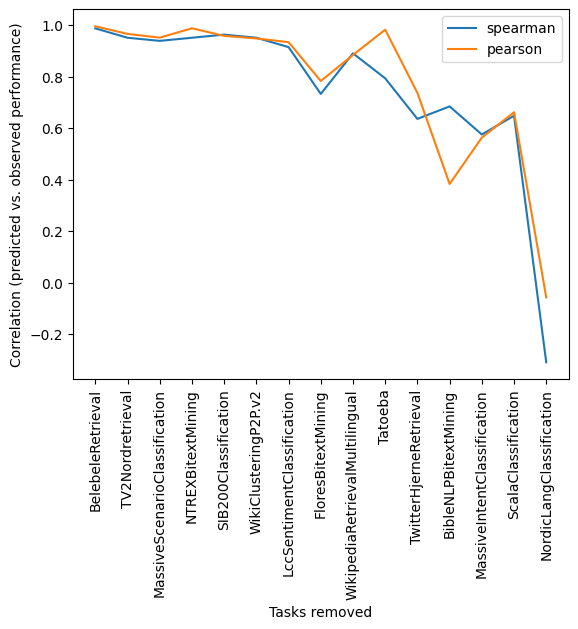

In [22]:
# plotting the predictability scores with the tasks removed
import matplotlib.pyplot as plt

for metric in ["spearman", "pearson"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Correlation (predicted vs. observed performance)")
plt.legend()

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

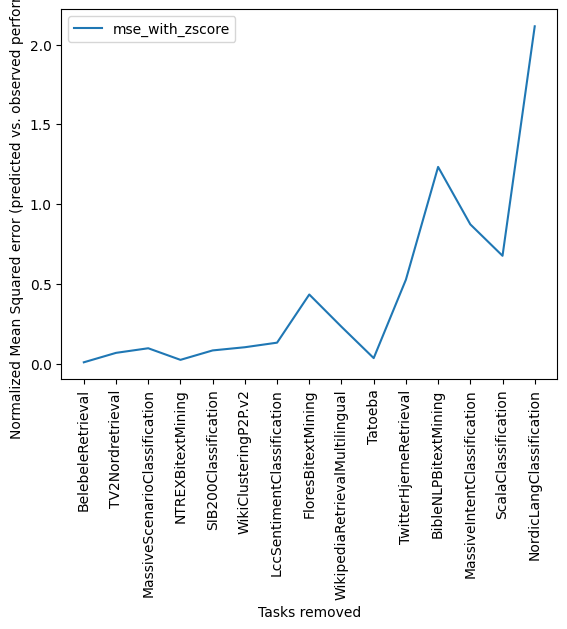

In [23]:
# plotting the predictability scores with the tasks removed
import matplotlib.pyplot as plt

for metric in ["mse_with_zscore"]:
    plt.plot([t[metric] for t in predicability_scores], label=metric)

plt.xlabel("Tasks removed")
plt.ylabel("Normalized Mean Squared error (predicted vs. observed performance)")
plt.legend()

# add task names to the x-axis
plt.xticks(range(len(tasks_removed)), tasks_removed, rotation=90)
plt.show()

## Constructing the Benchmark

In [24]:
# we now have the tasks:
tasks_to_select_from

['BornholmBitextMining',
 'AngryTweetsClassification',
 'SIB200ClusteringS2S',
 'DanFeverRetrieval',
 'WikipediaRerankingMultilingual']

In [25]:
# but some of the task above seem to be quite hard to predict, so we might want to include some of them back based on a threshold
benchmark_tasks = (
    tasks_to_select_from + tasks_removed[-1:]
)  # chosen somewhat arbitrarily based on the plot above [-4:] or [-5:] might be more reasonable
# but this makes running the benchmark faster, which is useful for this example

In [26]:
tasks = mteb.get_tasks(tasks=benchmark_tasks, languages=["dan"])

# we can now create a benchmark
benchmark = mteb.Benchmark(
    name="mteb(dan)",  # we recommend that the name is prefixed with "mteb" and that the language indicated using the ISO 639-3 code (3 letter code)
    tasks=tasks,
    description="Benchmark for evaluating Danish document embedding models",
    citation="",
    reference="",
)

Congratulations you just created your own benchmark. Once completed you can use the benchmark however you like. If you do believe that others would find the benchmark useable, we encourage that you submit a PR with the benchmark to mteb so that other can reproduce your results.

## Running the benchmark

You can naturally run the benchmark simply in `mteb` using:

In [27]:
# we can now run the benchmark
evaluator = mteb.MTEB(tasks=benchmark)

model = mteb.get_model("sentence-transformers/all-MiniLM-L6-v2")
results = evaluator.run(model)

───────────────────────────────────────────────── Selected tasks  ─────────────────────────────────────────────────

Clustering

- SIB200ClusteringS2S, s2s, multilingual 1 / 197 Subsets

Classification

- AngryTweetsClassification, s2s

- NordicLangClassification, s2s

BitextMining

- BornholmBitextMining, s2s

Reranking

- WikipediaRerankingMultilingual, s2p, multilingual 1 / 16 Subsets

Retrieval

- DanFeverRetrieval, p2p

## Aggregating Scores across Benchmark


In [29]:
# load task results for the specified models from mteb/results repository
mteb_results = mteb.load_results(models=models, tasks=benchmark)

Already up to date.


In [64]:
import mteb.task_aggregation as task_aggregation

mean = task_aggregation.mean(mteb_results)
weighted_mean = task_aggregation.task_category_weighted_mean(mteb_results)
borda = task_aggregation.borda_count(mteb_results)

In [65]:
import pandas as pd

data = []
for model_name, revisions in borda.items():
    for rev, avg_score in revisions.items():
        data.append(
            {
                "model": model_name,
                "revision": rev,
                "mean": mean[model_name][rev],
                "weighted_mean": weighted_mean[model_name][rev],
                "borda_count": avg_score,
            }
        )

df = pd.DataFrame(data)
df.sort_values("borda_count", ascending=False)

,model,revision,mean,weighted_mean,borda_count
5,intfloat/multilingual-e5-large-instruct,baa7be480a7de1539afce709c8f13f833a510e0a,0.631669,0.611051,64.0
9,intfloat/multilingual-e5-large,4dc6d853a804b9c8886ede6dda8a073b7dc08a81,0.536125,0.505508,55.0
6,intfloat/multilingual-e5-small,e4ce9877abf3edfe10b0d82785e83bdcb973e22e,0.526768,0.503706,50.0
10,intfloat/multilingual-e5-base,d13f1b27baf31030b7fd040960d60d909913633f,0.525225,0.498132,50.0
11,sentence-transformers/paraphrase-multilingual-...,79f2382ceacceacdf38563d7c5d16b9ff8d725d6,0.430674,0.420396,36.0
0,sentence-transformers/LaBSE,e34fab64a3011d2176c99545a93d5cbddc9a91b7,0.443979,0.446280,34.0
8,sentence-transformers/paraphrase-multilingual-...,bf3bf13ab40c3157080a7ab344c831b9ad18b5eb,0.413172,0.402389,29.0
4,sentence-transformers/all-MiniLM-L12-v2,a05860a77cef7b37e0048a7864658139bc18a854,0.399563,0.382440,28.0
2,sentence-transformers/all-mpnet-base-v2,84f2bcc00d77236f9e89c8a360a00fb1139bf47d,0.372704,0.352972,22.0
7,sentence-transformers/all-MiniLM-L6-v2,8b3219a92973c328a8e22fadcfa821b5dc75636a,0.377550,0.355880,22.0
